In [1]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import re
picture_path = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Python/Project for practicing/Advance-Medical-transformation/Backend/notebooks/dark_image.jpg'
pdf_path = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Python/Project for practicing/Advance-Medical-transformation/Backend/resources/prescription/pre_1.pdf'
path_poppler = '/usr/local/Cellar/poppler/24.04.0_1/bin'
pdf_path_patient = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Python/Project for practicing/Advance-Medical-transformation/Backend/resources/patient_details/pd_1.pdf'


## 1. Print text from image ##

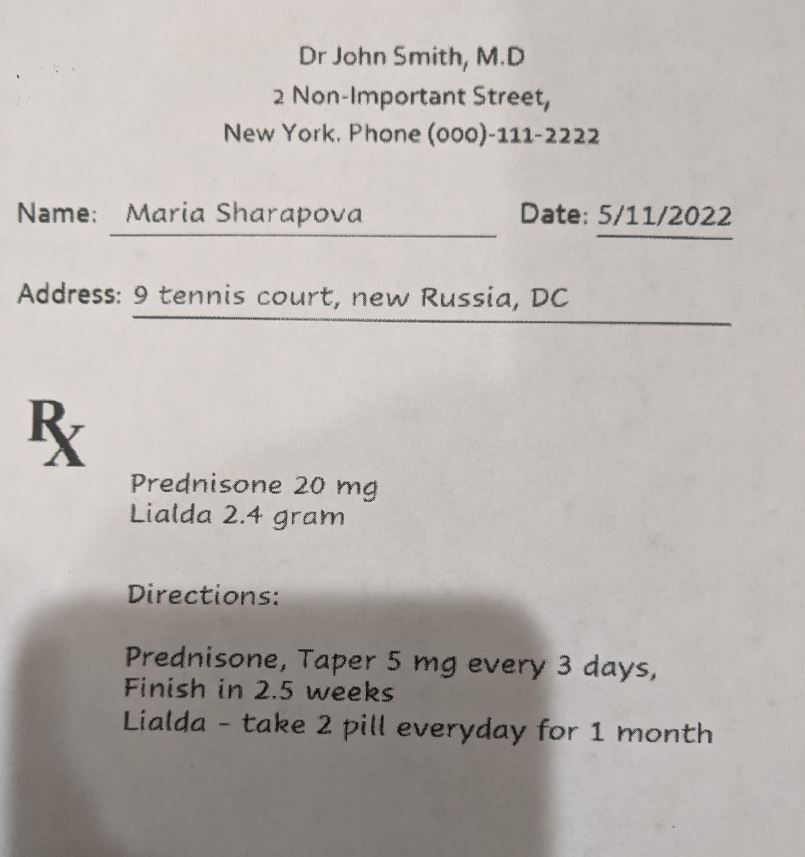

In [2]:

page_pic = Image.open(picture_path)
page_pic

In [3]:
text_pic = pytesseract.image_to_string(page_pic)
print(text_pic)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

a4

Prednisone 20 mg
Lialda 2.4 gram

3 days,

rl month



## 2.Print text from pdf file ##

In [4]:
def get_text(page_path_1):    
    pages = convert_from_path(page_path_1, poppler_path=path_poppler)
    document = ''
    for page_num, page in enumerate(pages):    
        text_pdf = pytesseract.image_to_string(page)
        document = '\n' + text_pdf
#         print(text_pdf)
        return document

In [5]:
get_get = get_text(pdf_path2)
print(get_get)


47/12/2020

Patient Medical Record

Patient Information Birth Date
Kathy Crawford May 6 1972
(737) 988-0851 Weight
9264 Ash Dr 95
New York City, 10005 .
United States Height:
190
In Case of Emergency
m _ a _
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone
Genera! Medical History

Chicken Pox (Varicella):

IMMUNE

Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches):

Migraine



## 3. Using OpenCv to print text from tough image ##

In [6]:
open_image = Image.open(picture_path)
print(open_image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=805x857 at 0x14E67EAD0>


In [7]:
pic_cv = cv.imread(picture_path, cv.IMREAD_GRAYSCALE)
th1 = cv.adaptiveThreshold(pic_cv, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                          cv.THRESH_BINARY, 55,10)
plt.imshow(th1, 'grey')
text_picture = pytesseract.image_to_string(th1)
print(text_picture)

NameError: name 'cv' is not defined

## 4. Print text from tough pdf ##

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def get_text_from_pdf(file_pdf):
    page_pdf = convert_from_path(file_pdf, poppler_path=path_poppler)
    holder = ''
    for page_num, page in enumerate(page_pdf):
#         pil_page = page_pdf[page_num]
        page1 = np.array(page)
    
        page_greyScale = cv.cvtColor(page1, cv.COLOR_RGB2GRAY)
        
        resized = cv.resize(page_greyScale, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_LINEAR)
        
        th = cv.adaptiveThreshold(resized, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                 cv.THRESH_BINARY, 65, 20)
        text_from_pdf = pytesseract.image_to_string(th)
        holder += f"page {page_num + 1} : \n{text_from_pdf}\n\n"
            
    return holder
    
get_text_done = get_text_from_pdf(pdf_path2)
print(get_text_done)

In [ ]:
get_text_done = get_text_from_pdf(pdf_path)
print(get_text_done)


In [26]:
text = '''
page 1:
 Dr John Smith, M.O
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Lialda 2.4 gram

Directions:
Prednisone, Taper 5 mg every 3 days,

Finish in 2.5 weeks
Liatda - take 2 pill everyday for 1 month

Refill: 2. times
'''

In [4]:
name_pattern = 'Name: (.*)Date'
name = re.findall(name_pattern, text)
print(name[0].strip())

Maria Sharapova


In [6]:
address_pattern = 'Address: .*'
address = re.findall(address_pattern,text)
print(f'address : {address[0]}')

address : Address: 9 tennis court, new Russia, DC


In [45]:
pattern2 = 'Address[^\n]*(.*)Directions:'
description2 = re.findall(pattern2, text, re.DOTALL)
data = description2[0].strip()
for i in data:
    if i =='K':
        pattern4 = '\w*K\w*'
        new1 = re.findall(pattern4, data)
        new1 = new1[0].strip()
        new = data.replace(new1,'').strip()
        print(new)
    else:
        data


Prednisone 20 mg
Lialda 2.4 gram


In [37]:
pattern3 = 'Address[^\n]*(.*)Directions:'
description3 = re.findall(pattern3, text, re.DOTALL)
print(description3[0].strip())

K

Prednisone 20 mg
Lialda 2.4 gram


In [13]:
description_pattern = 'Address:\s[^\n]+\n+\s[^\n]\s(.*)Directions:'
description = re.findall(pattern, text, re.DOTALL)
print(description[0].strip())


NameError: name 'pattern' is not defined

In [10]:
directions_pattern = 'Directions:\n(.*)Refill'
direction = re.findall(directions_pattern, text, re.DOTALL)
# print(re.sub('\n+','\n',direction[0]))
print(direction[0].strip())

Prednisone, Taper 5 mg every 3 days,

Finish in 2.5 weeks
Liatda - take 2 pill everyday for 1 month


In [12]:
refill_pattern = 'Refill:\s(.*)'
refill = re.findall(refill_pattern, text)
print(f'refill : {refill[0]} time(s)')

refill : 2. times time(s)
